# TASK 2 : PREDICTION USING UNSUPERVISED ML

# Name: Vidhyesh Pophalkar

In [2]:
# Task: From the given Iris dataset,predict the optimum no. of clusters and represent it visually

In [27]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data 

In [28]:
# Importing data
my_data = pd.read_csv(r"C:\Users\PC\Desktop\Iris.csv")
my_data = my_data.drop(["Species","Id"],axis = 1)

In [29]:
# first 10 entries of the data
my_data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [30]:
# summary about the data
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [31]:
# summary stats of the data
my_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
# checking for missing values
my_data.isna().any().any()

False

In [33]:
# checking the shape of data
my_data.shape

(150, 4)

# To find the optimum number of clusters for K-means.

In [34]:
# optimum no. of clusters for k-means classification
x = my_data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",max_iter = 300,n_init = 10,random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

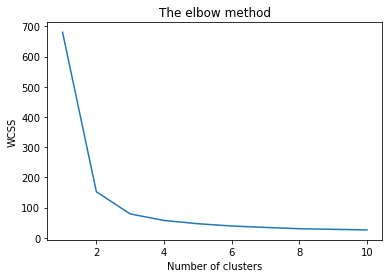

In [35]:
# plotting the results onto a line graph
# allowing us to observe the elbow
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  # Within cluster sum of squares
plt.show()

In [36]:
for i in range(1,10):
    print(f"{i}:{wcss[i]}")

1:152.36870647733915
2:78.94084142614601
3:57.34540931571815
4:46.535582051282034
5:38.93873974358975
6:34.190687924796634
7:29.90537429982511
8:27.927882157034986
9:25.955497086247092


From the above graph,the optimum clusters is where the elbow occurs.This is when the WCSS(Within cluster sum of squares) doesn't decrease significantly with every iteration.

From this we choose the no of clusters as "3".

# Applying k-means to the dataset

In [37]:
# applying k-means to the dataset/creating the k-means classifier
kmeans = KMeans(n_clusters = 3,init = "k-means++",max_iter = 300,n_init = 10,random_state = 0)
y_kmeans = kmeans.fit_predict(x)

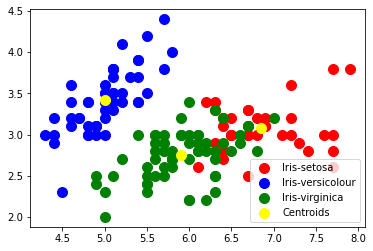

In [38]:
# Visualising the clusters -On the first 2 colns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Hence,The Dataset "IRIS" is visualized into 3 clusters and their centroids are as shown.